In [ ]:
!pip install catboost
!pip install lightgbm
!pip install xgboost
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import warnings
warnings.simplefilter(action="ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")

In [159]:
df = pd.read_csv('/Users/simayozkan/Downloads/1.csv')

In [160]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [161]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000,1.620,64.000,yes,no,2.000,3.000,Sometimes,no,2.000,no,0.000,1.000,no,Public_Transportation,Normal_Weight
1,Female,21.000,1.520,56.000,yes,no,3.000,3.000,Sometimes,yes,3.000,yes,3.000,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000,1.800,77.000,yes,no,2.000,3.000,Sometimes,no,2.000,no,2.000,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000,1.800,87.000,no,no,3.000,3.000,Sometimes,no,2.000,no,2.000,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22.000,1.780,89.800,no,no,2.000,1.000,Sometimes,no,2.000,no,0.000,0.000,Sometimes,Public_Transportation,Overweight_Level_II


In [162]:
df.columns = [col.upper() for col in df.columns]

In [163]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
 

check_df(df)

##################### Shape #####################
(2111, 17)
##################### Types #####################
GENDER                             object
AGE                               float64
HEIGHT                            float64
WEIGHT                            float64
FAMILY_HISTORY_WITH_OVERWEIGHT     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NOBEYESDAD                         object
dtype: object
##################### Head #####################
   GENDER    AGE  HEIGHT  WEIGHT FAMILY_HISTORY_WITH_OVERWEIGHT FAVC  FCVC   NCP       CAEC SMOKE  CH2O  SCC   F

In [164]:
df['AGE'] = df['AGE'].astype(int)
df['FCVC'] = df['FCVC'].astype(int)
df['FAF'] = df['FAF'].astype(int)
df['TUE'] = df['TUE'].astype(int)
df['CH2O'] = df['CH2O'].astype(int)
df['NCP'] = df['NCP'].astype(int)

In [165]:
check_df(df)

##################### Shape #####################
(2111, 17)
##################### Types #####################
GENDER                             object
AGE                                 int64
HEIGHT                            float64
WEIGHT                            float64
FAMILY_HISTORY_WITH_OVERWEIGHT     object
FAVC                               object
FCVC                                int64
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                                int64
SCC                                object
FAF                                 int64
TUE                                 int64
CALC                               object
MTRANS                             object
NOBEYESDAD                         object
dtype: object
##################### Head #####################
   GENDER  AGE  HEIGHT  WEIGHT FAMILY_HISTORY_WITH_OVERWEIGHT FAVC  FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  

In [166]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

   
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car, num_but_cat

In [167]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
print(cat_cols)
print(num_cols)
print(cat_but_car)
print(num_but_cat)

Observations: 2111
Variables: 17
cat_cols: 14
num_cols: 3
cat_but_car: 0
num_but_cat: 5
['GENDER', 'FAMILY_HISTORY_WITH_OVERWEIGHT', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NOBEYESDAD', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
['AGE', 'HEIGHT', 'WEIGHT']
[]
['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [168]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

        GENDER  Ratio
GENDER               
Male      1068 50.592
Female    1043 49.408
##########################################
                                FAMILY_HISTORY_WITH_OVERWEIGHT  Ratio
FAMILY_HISTORY_WITH_OVERWEIGHT                                       
yes                                                       1726 81.762
no                                                         385 18.238
##########################################
      FAVC  Ratio
FAVC             
yes   1866 88.394
no     245 11.606
##########################################
            CAEC  Ratio
CAEC                   
Sometimes   1765 83.610
Frequently   242 11.464
Always        53  2.511
no            51  2.416
##########################################
       SMOKE  Ratio
SMOKE              
no      2067 97.916
yes       44  2.084
##########################################
      SCC  Ratio
SCC             
no   2015 95.452
yes    96  4.548
##########################################
          

count   2111.000
mean      23.973
std        6.309
min       14.000
5%        17.000
10%       18.000
20%       19.000
30%       20.000
40%       21.000
50%       22.000
60%       23.000
70%       25.000
80%       28.000
90%       33.000
95%       38.000
99%       43.000
max       61.000
Name: AGE, dtype: float64


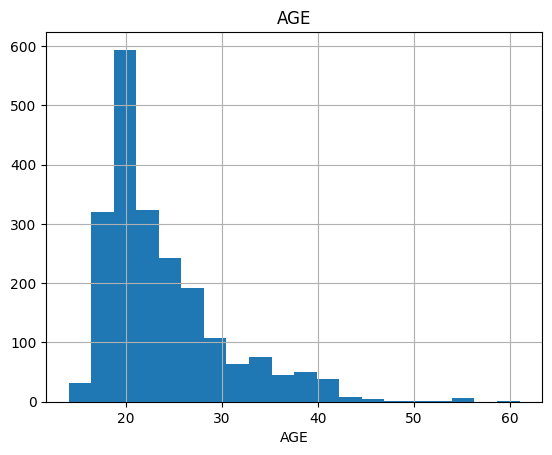

count   2111.000
mean       1.702
std        0.093
min        1.450
5%         1.548
10%        1.580
20%        1.620
30%        1.645
40%        1.674
50%        1.700
60%        1.733
70%        1.756
80%        1.784
90%        1.824
95%        1.850
99%        1.909
max        1.980
Name: HEIGHT, dtype: float64


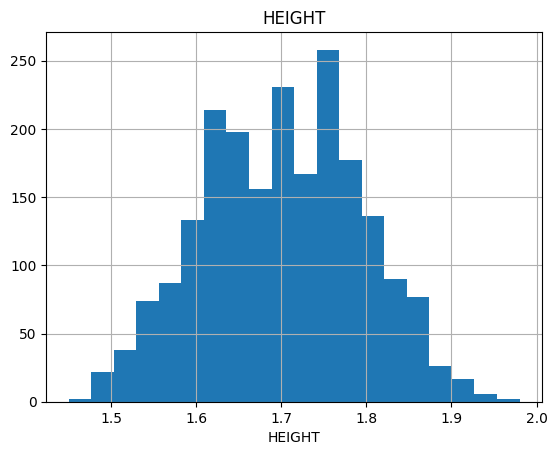

count   2111.000
mean      86.586
std       26.191
min       39.000
5%        48.500
10%       51.154
20%       60.628
30%       70.000
40%       78.429
50%       83.000
60%       90.004
70%      104.549
80%      111.914
90%      120.922
95%      131.916
99%      150.333
max      173.000
Name: WEIGHT, dtype: float64


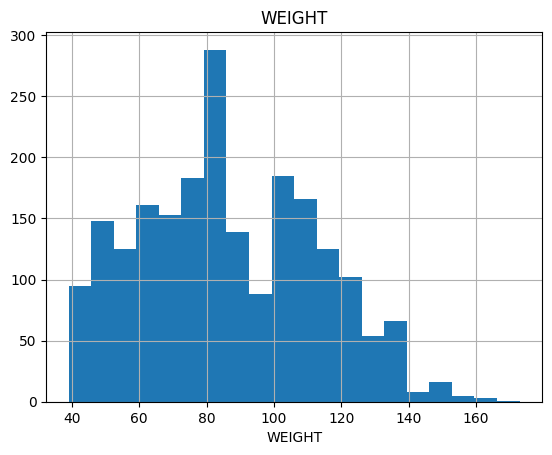

In [169]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

In [170]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

In [171]:
df.head()

,GENDER,AGE,HEIGHT,WEIGHT,FAMILY_HISTORY_WITH_OVERWEIGHT,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NOBEYESDAD
0,Female,21,1.620,64.000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.520,56.000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800,77.000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800,87.000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780,89.800,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


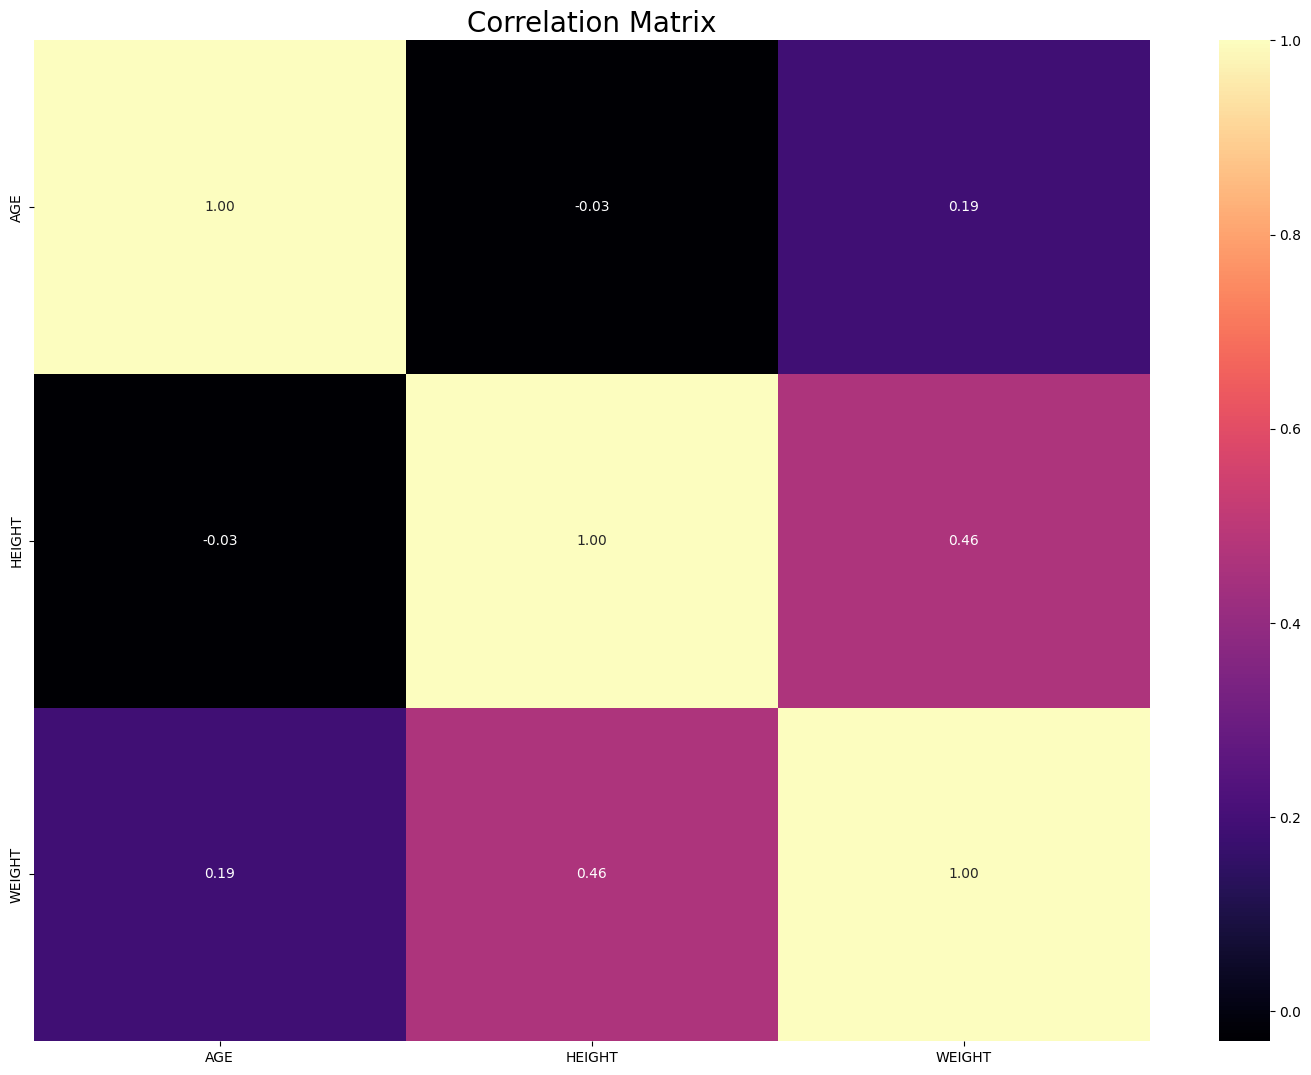

In [172]:
f, ax = plt.subplots(figsize = [18, 13])
sns.heatmap(df[num_cols].corr(), annot = True, fmt = ".2f", ax = ax, cmap = "magma")
ax.set_title("Correlation Matrix", fontsize = 20)
plt.show()

In [173]:
label_encoder = LabelEncoder()
df['NOBEYESDAD'] = label_encoder.fit_transform(df['NOBEYESDAD'])
df['NOBEYESDAD'].value_counts()

NOBEYESDAD
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

In [174]:
for col in cat_cols:
    target_summary_with_cat(df, "NOBEYESDAD", col)

GENDER
        TARGET_MEAN  Count  Ratio
GENDER                           
Female        2.966   1043 49.408
Male          3.064   1068 50.592


FAMILY_HISTORY_WITH_OVERWEIGHT
                                TARGET_MEAN  Count  Ratio
FAMILY_HISTORY_WITH_OVERWEIGHT                           
no                                    1.719    385 18.238
yes                                   3.305   1726 81.762


FAVC
      TARGET_MEAN  Count  Ratio
FAVC                           
no          2.776    245 11.606
yes         3.047   1866 88.394


CAEC
            TARGET_MEAN  Count  Ratio
CAEC                                 
Always            1.811     53  2.511
Frequently        1.107    242 11.464
Sometimes         3.290   1765 83.610
no                3.843     51  2.416


SMOKE
       TARGET_MEAN  Count  Ratio
SMOKE                           
no           3.022   2067 97.916
yes          2.705     44  2.084


SCC
     TARGET_MEAN  Count  Ratio
SCC                           
no         3.0

<Axes: ylabel='Density'>

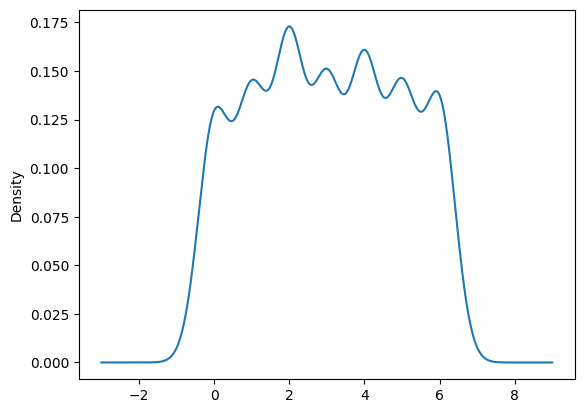

In [175]:
df['NOBEYESDAD'].plot.kde()

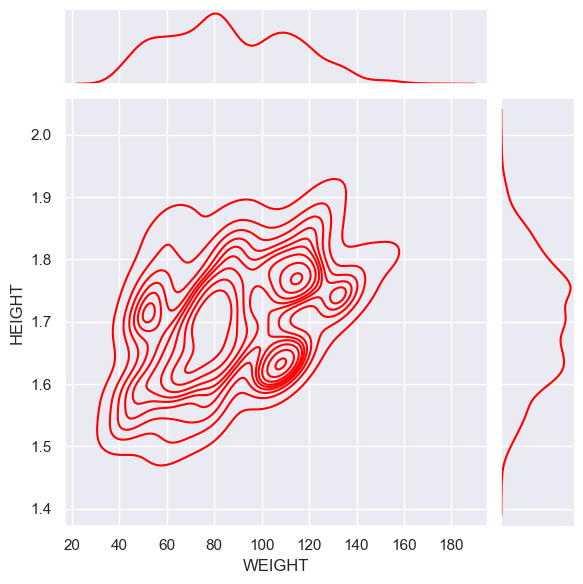

In [258]:
sns.jointplot(x='WEIGHT',y='HEIGHT',data=df,color='red',kind='kde');

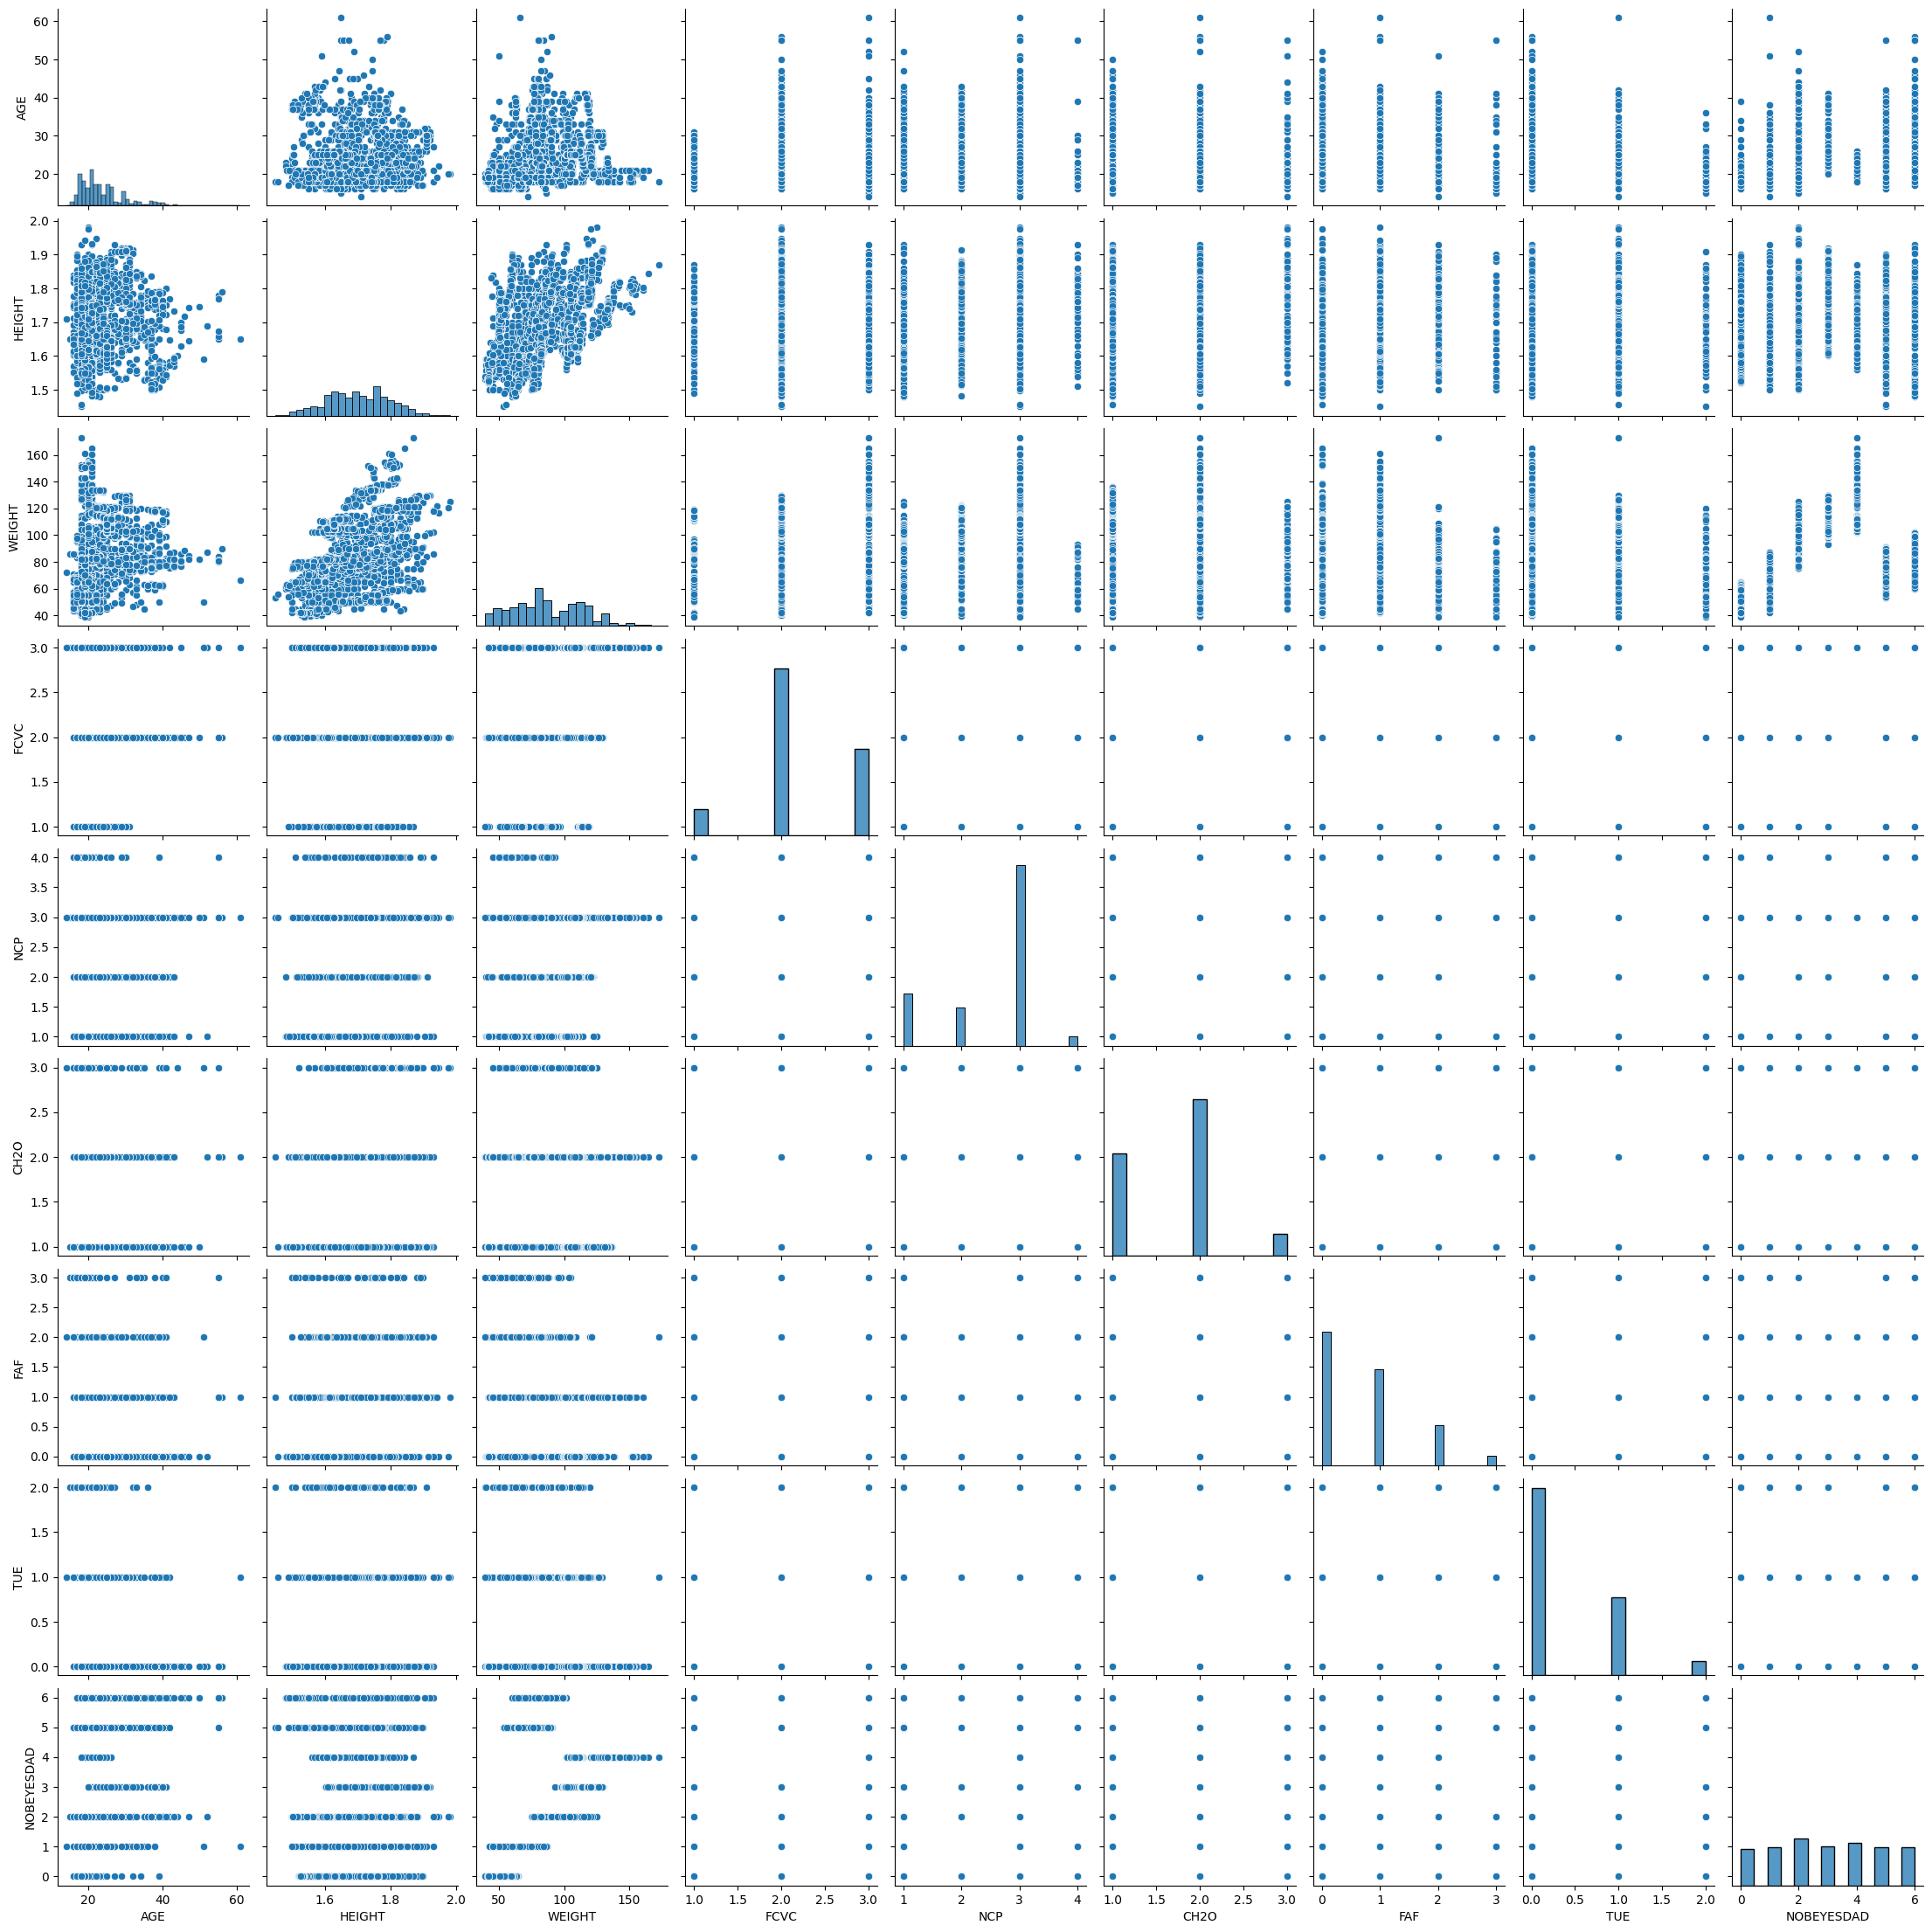

In [177]:
sns.pairplot(df)

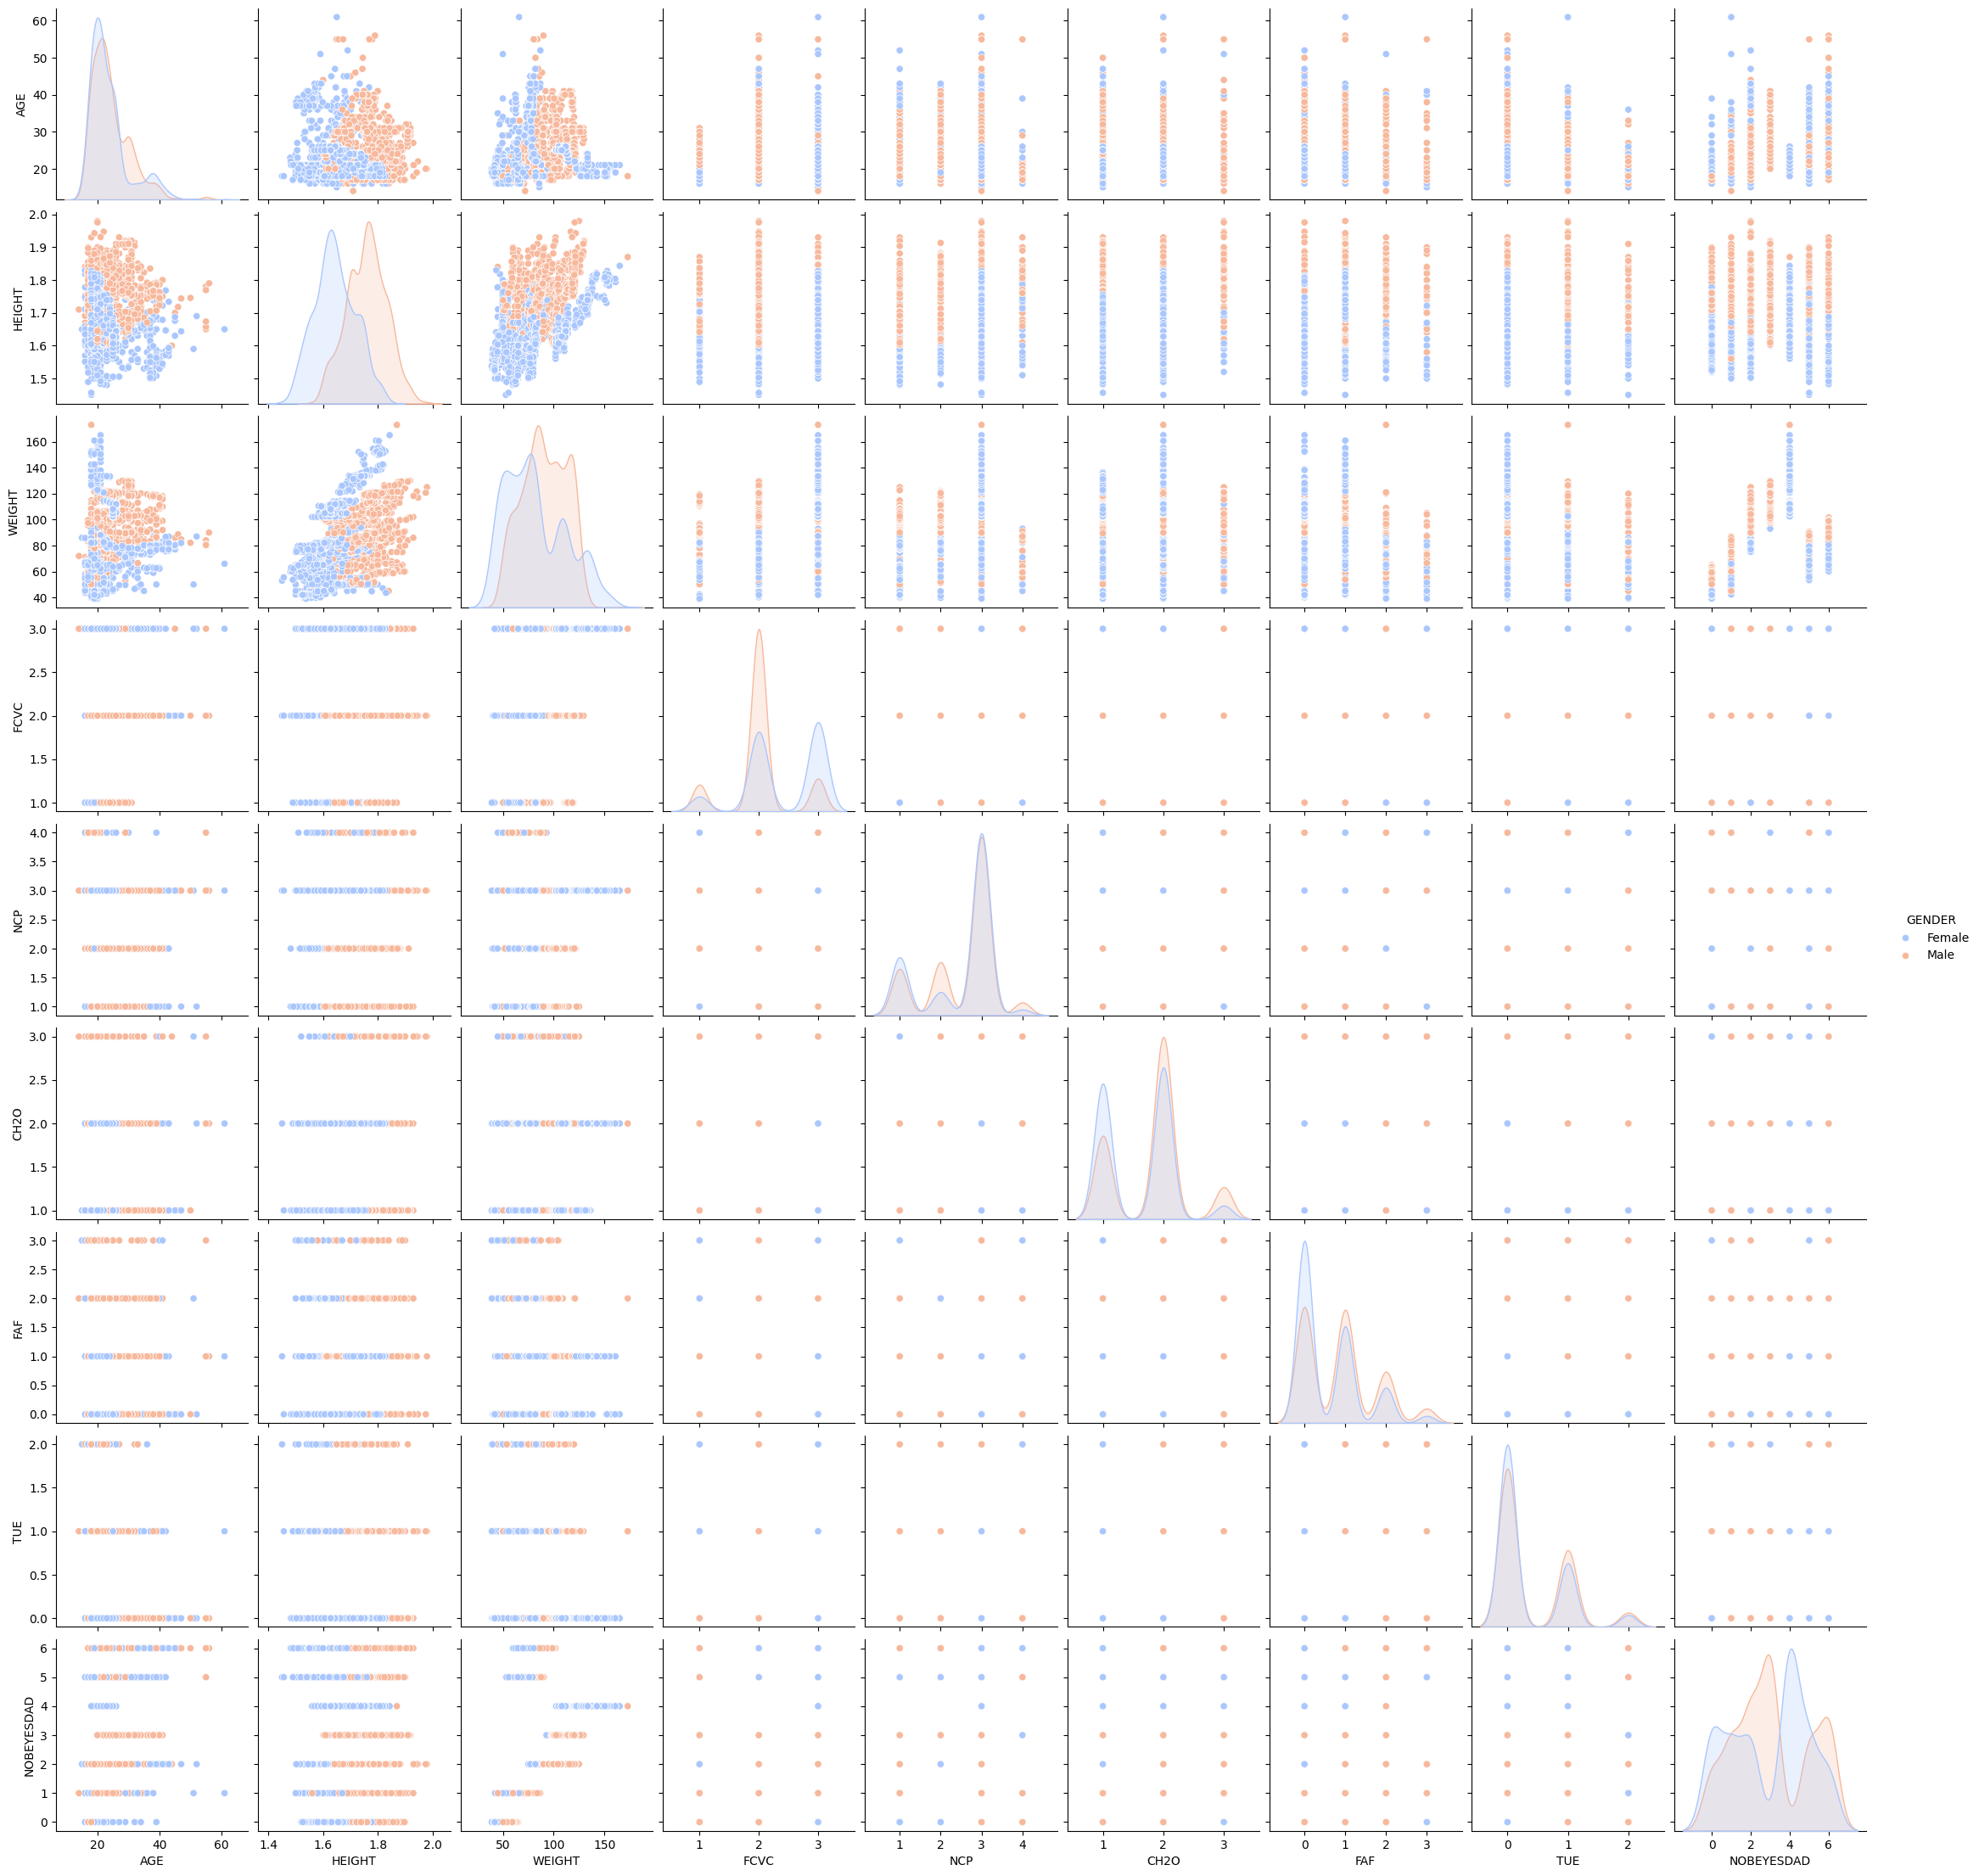

In [178]:
sns.pairplot(df, hue = 'GENDER',palette = 'coolwarm')

In [179]:
df.isnull().sum()

GENDER                            0
AGE                               0
HEIGHT                            0
WEIGHT                            0
FAMILY_HISTORY_WITH_OVERWEIGHT    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NOBEYESDAD                        0
dtype: int64

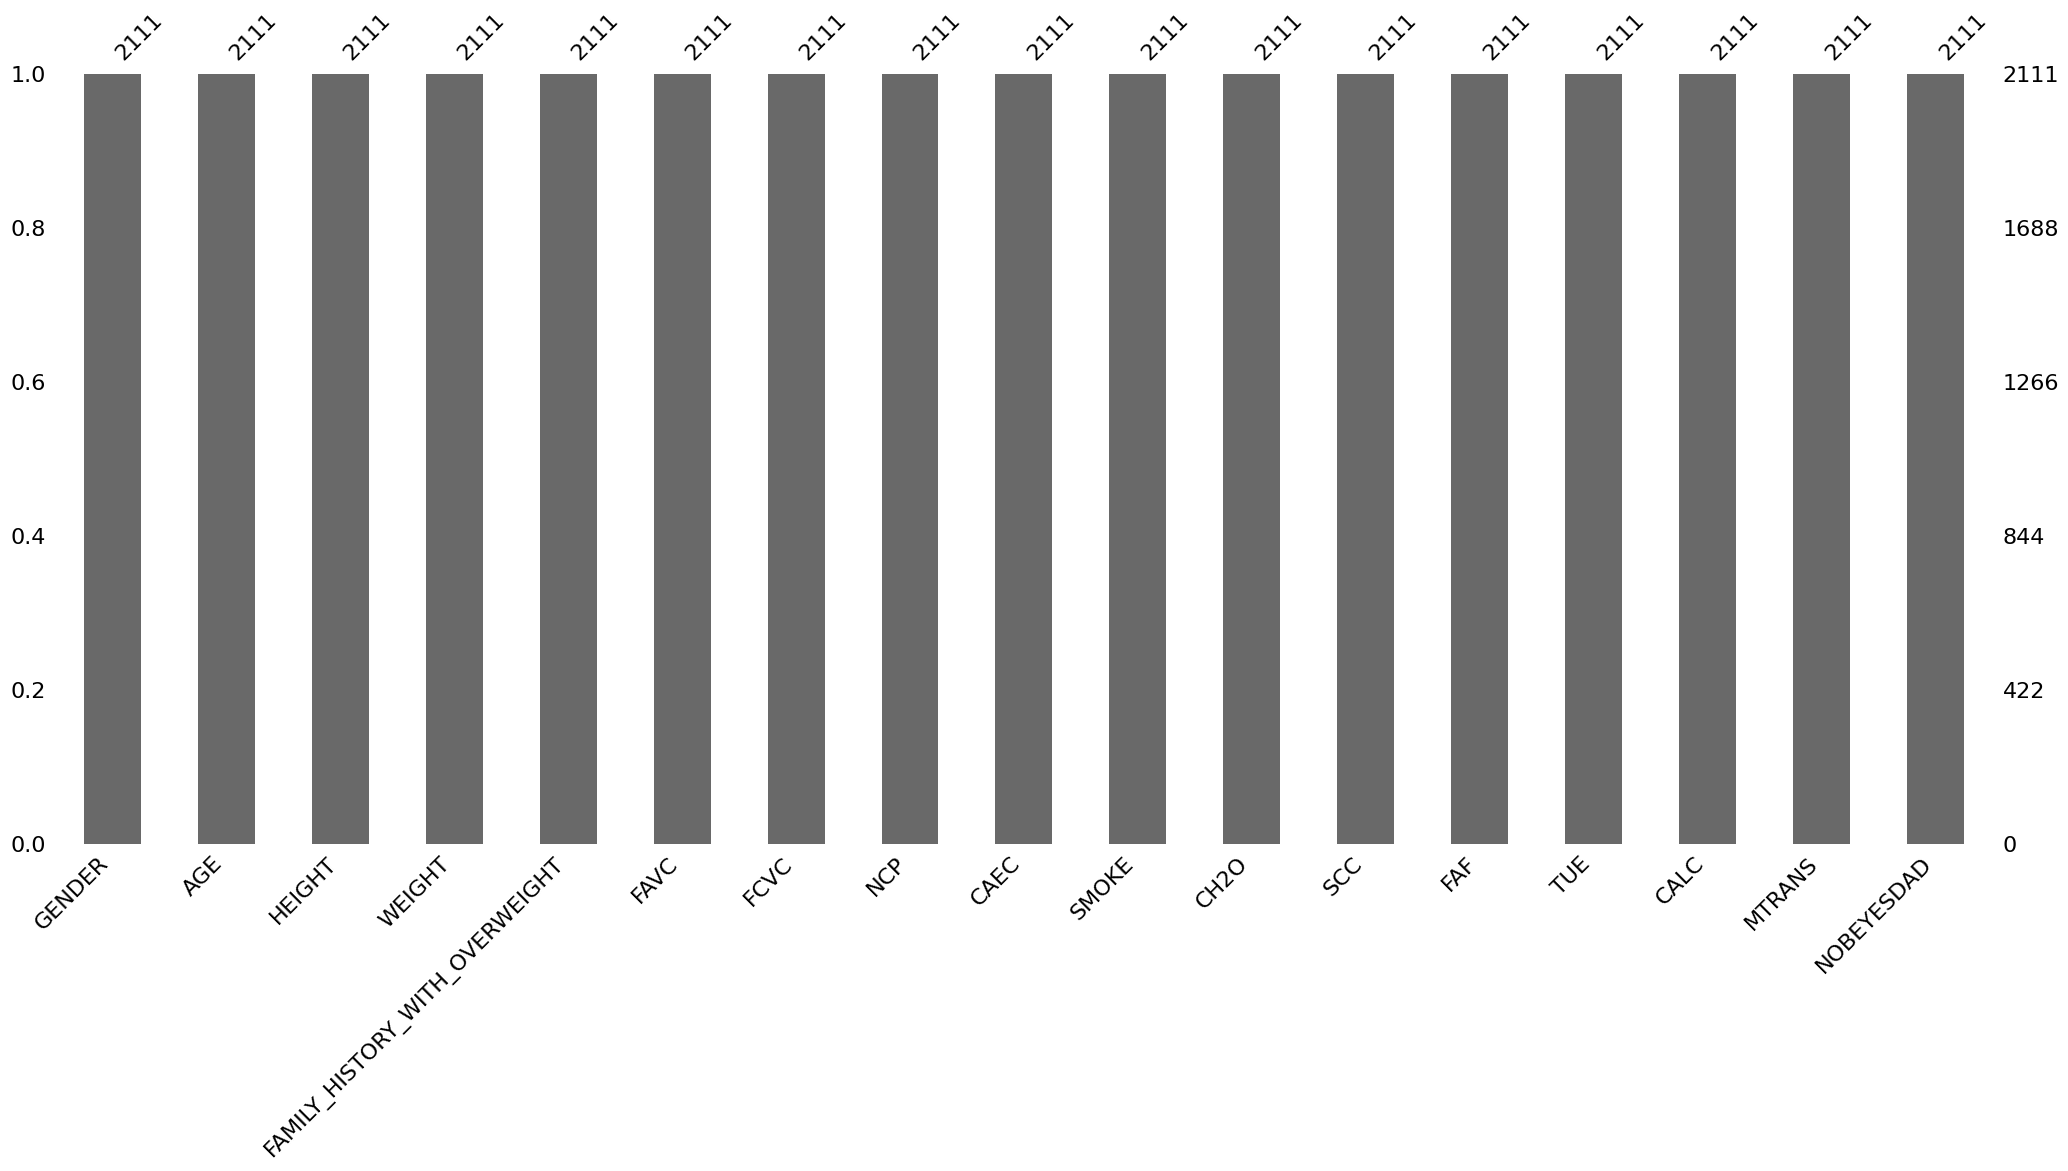

In [180]:
msno.bar(df)
plt.show()

In [181]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


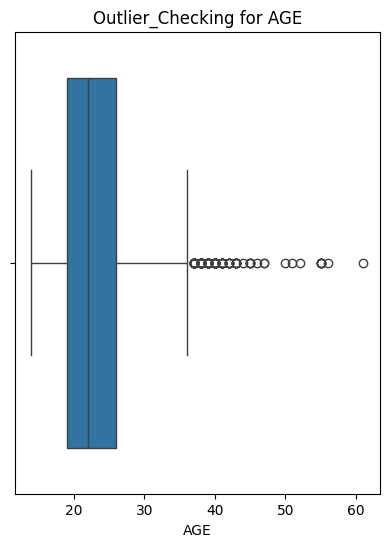

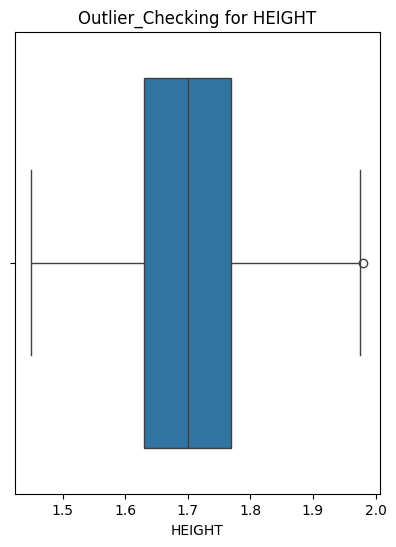

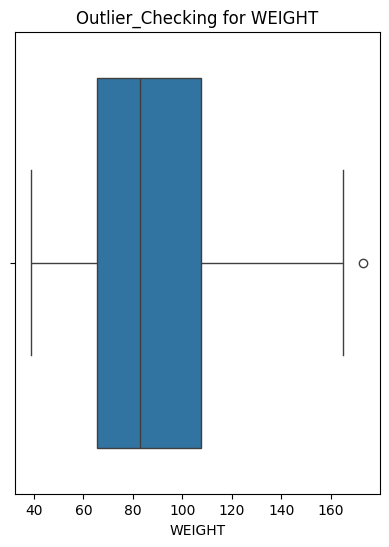

In [182]:
for i, col in enumerate(num_cols, start=1):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(x=df[col])
    plt.title(f"Outlier_Checking for {col}")
    plt.show()

In [183]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [184]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [185]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [186]:
for col in num_cols:
    print(f"Outliers for {col}: {grab_outliers(df,col)}")

Empty DataFrame
Columns: [GENDER, AGE, HEIGHT, WEIGHT, FAMILY_HISTORY_WITH_OVERWEIGHT, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NOBEYESDAD]
Index: []
Outliers for AGE: None
Empty DataFrame
Columns: [GENDER, AGE, HEIGHT, WEIGHT, FAMILY_HISTORY_WITH_OVERWEIGHT, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NOBEYESDAD]
Index: []
Outliers for HEIGHT: None
Empty DataFrame
Columns: [GENDER, AGE, HEIGHT, WEIGHT, FAMILY_HISTORY_WITH_OVERWEIGHT, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NOBEYESDAD]
Index: []
Outliers for WEIGHT: None


In [187]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [188]:
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

AGE False
HEIGHT False
WEIGHT False


In [189]:
df.head()

,GENDER,AGE,HEIGHT,WEIGHT,FAMILY_HISTORY_WITH_OVERWEIGHT,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NOBEYESDAD
0,Female,21,1.620,64.000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,1
1,Female,21,1.520,56.000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,1
2,Male,23,1.800,77.000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,1
3,Male,27,1.800,87.000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,5
4,Male,22,1.780,89.800,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,6


In [190]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols


['GENDER', 'FAMILY_HISTORY_WITH_OVERWEIGHT', 'FAVC', 'SMOKE', 'SCC']

In [191]:
for col in binary_cols:
    df = label_encoder(df, col)

In [192]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col != "NOBEYESDAD"]
cat_cols

['CAEC', 'CALC', 'MTRANS', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [193]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [194]:
df.head()

,GENDER,AGE,HEIGHT,WEIGHT,FAMILY_HISTORY_WITH_OVERWEIGHT,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NOBEYESDAD
0,0,21,1.620,64.000,1,0,2,3,Sometimes,0,2,0,0,1,no,Public_Transportation,1
1,0,21,1.520,56.000,1,0,3,3,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,1
2,1,23,1.800,77.000,1,0,2,3,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,1
3,1,27,1.800,87.000,0,0,3,3,Sometimes,0,2,0,2,0,Frequently,Walking,5
4,1,22,1.780,89.800,0,0,2,1,Sometimes,0,2,0,0,0,Sometimes,Public_Transportation,6


In [198]:
df['CAEC']= label_encoder.fit_transform(df['CAEC']) 
df['CALC']= label_encoder.fit_transform(df['CALC']) 
df['MTRANS']= label_encoder.fit_transform(df['MTRANS']) 

In [199]:
df.head()

,GENDER,AGE,HEIGHT,WEIGHT,FAMILY_HISTORY_WITH_OVERWEIGHT,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NOBEYESDAD
0,0,21,1.620,64.000,1,0,2,3,2,0,2,0,0,1,3,3,1
1,0,21,1.520,56.000,1,0,3,3,2,1,3,1,3,0,2,3,1
2,1,23,1.800,77.000,1,0,2,3,2,0,2,0,2,1,1,3,1
3,1,27,1.800,87.000,0,0,3,3,2,0,2,0,2,0,1,4,5
4,1,22,1.780,89.800,0,0,2,1,2,0,2,0,0,0,2,3,6


In [219]:
y = df["NOBEYESDAD"]
X = df.drop(["NOBEYESDAD", "WEIGHT", "HEIGHT"], axis=1)

In [220]:
models = [('LR', LogisticRegression(solver="liblinear", random_state=25)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=25)),
          ('RF', RandomForestClassifier(random_state=25)),
          ('SVM', SVC(probability=True, gamma='auto', random_state=25)),
          ("GNB", GaussianNB()),
          ('MLP', MLPClassifier(random_state=25)),
          ('XGB', XGBClassifier(random_state=25)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=25))]

In [221]:
def evaluate_model(model, X, y, test_size=0.2, random_state=None):
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)
     print(f"########## {name} ##########")
     print("AUC =", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
     print(classification_report(y_test, y_pred))

In [222]:
for name, model in models:
   evaluate_model(model, X, y, test_size=0.2, random_state=17)

########## LR ##########
AUC = 0.8357628970448575
              precision    recall  f1-score   support

           0       0.48      0.46      0.47        57
           1       0.33      0.25      0.28        61
           2       0.39      0.55      0.45        67
           3       0.45      0.81      0.57        57
           4       0.87      1.00      0.93        60
           5       0.39      0.19      0.26        57
           6       0.54      0.23      0.33        64

    accuracy                           0.50       423
   macro avg       0.49      0.50      0.47       423
weighted avg       0.49      0.50      0.47       423

########## KNN ##########
AUC = 0.9106728795011276
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        57
           1       0.59      0.21      0.31        61
           2       0.63      0.75      0.68        67
           3       0.66      0.95      0.78        57
           4       0.87      1.

In [243]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring= {
        'f1_score': make_scorer(f1_score, average='micro'),
        'precision_score': make_scorer(precision_score, average='micro'),
        'recall_score': make_scorer(recall_score, average='micro'),
        'accuracy_score': make_scorer(accuracy_score),
        'roc_auc': 'roc_auc_ovr'
    })

    print(f"########## {name} ##########")

    # Access the results using the correct keys
    print(f"Accuracy: {round(cv_results['test_accuracy_score'].mean(), 4)}")
    print(f"ROC AUC: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall_score'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision_score'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1_score'].mean(), 4)}")

########## LR ##########
Accuracy: 0.5477
ROC AUC: 0.8598
Recall: 0.5477
Precision: 0.5477
F1: 0.5477
########## KNN ##########
Accuracy: 0.7358
ROC AUC: 0.9137
Recall: 0.7358
Precision: 0.7358
F1: 0.7358
########## CART ##########
Accuracy: 0.7614
ROC AUC: 0.8664
Recall: 0.7614
Precision: 0.7614
F1: 0.7614
########## RF ##########
Accuracy: 0.8093
ROC AUC: 0.9609
Recall: 0.8093
Precision: 0.8093
F1: 0.8093
########## SVM ##########
Accuracy: 0.7263
ROC AUC: 0.9369
Recall: 0.7263
Precision: 0.7263
F1: 0.7263
########## GNB ##########
Accuracy: 0.5448
ROC AUC: 0.8488
Recall: 0.5448
Precision: 0.5448
F1: 0.5448
########## MLP ##########
Accuracy: 0.6453
ROC AUC: 0.9004
Recall: 0.6453
Precision: 0.6453
F1: 0.6453
########## XGB ##########
Accuracy: 0.8059
ROC AUC: 0.9573
Recall: 0.8059
Precision: 0.8059
F1: 0.8059
########## CatBoost ##########
Accuracy: 0.8059
ROC AUC: 0.9608
Recall: 0.8059
Precision: 0.8059
F1: 0.8059


In [246]:
#Hiperparameter Optimization
xgboost_model = XGBClassifier(random_state=17)

xgboost_params = {"learning_rate": [0.1, 0.01, 0.001],
                  "max_depth": [5, 10, 20],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.5, 0.7, 1]}

xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [247]:
xgboost_best_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 20,
 'n_estimators': 500}

In [248]:
cv_results = cross_validate(xgboost_final, X, y, cv=10, scoring= {
        'f1_score': make_scorer(f1_score, average='weighted'),
        'precision_score': make_scorer(precision_score, average='weighted'),
        'recall_score': make_scorer(recall_score, average='weighted'),
        'accuracy_score': make_scorer(accuracy_score),
        'roc_auc': "roc_auc_ovr"})

print(cv_results['test_accuracy_score'].mean())
print(cv_results['test_f1_score'].mean())
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_recall_score'].mean())
print(cv_results['test_precision_score'].mean())

0.8097357596351605
0.8086278687923227
0.9636305587148357
0.8097357596351605
0.8295018773064745


In [249]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 7, "auto"],
             "min_samples_split": [5, 8, 15],
             "n_estimators": [100, 500]}
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [250]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_split': 5,
 'n_estimators': 500}

In [251]:
cv_results = cross_validate(rf_final, X, y, cv=10, scoring= {
        'f1_score': make_scorer(f1_score, average='weighted'),
        'precision_score': make_scorer(precision_score, average='weighted'),
        'recall_score': make_scorer(recall_score, average='weighted'),
        'accuracy_score': make_scorer(accuracy_score),
        'roc_auc': "roc_auc_ovr"})

print(cv_results['test_accuracy_score'].mean())
print(cv_results['test_f1_score'].mean())
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_recall_score'].mean())
print(cv_results['test_precision_score'].mean())

0.8102141643566128
0.8098022699882998
0.9625456103247743
0.8102141643566128
0.8298104342474861


In [252]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [253]:
catboost_best_grid.best_params_

{'depth': 6, 'iterations': 500, 'learning_rate': 0.1}

In [254]:
cv_results = cross_validate(catboost_final, X, y, cv=10, scoring= {
        'f1_score': make_scorer(f1_score, average='weighted'),
        'precision_score': make_scorer(precision_score, average='weighted'),
        'recall_score': make_scorer(recall_score, average='weighted'),
        'accuracy_score': make_scorer(accuracy_score),
        'roc_auc': "roc_auc_ovr"})

print(cv_results['test_accuracy_score'].mean())
print(cv_results['test_f1_score'].mean())
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_recall_score'].mean())
print(cv_results['test_precision_score'].mean())

0.8049964231422695
0.8042484354543247
0.9601011580775483
0.8049964231422695
0.8224544810591954


In [255]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

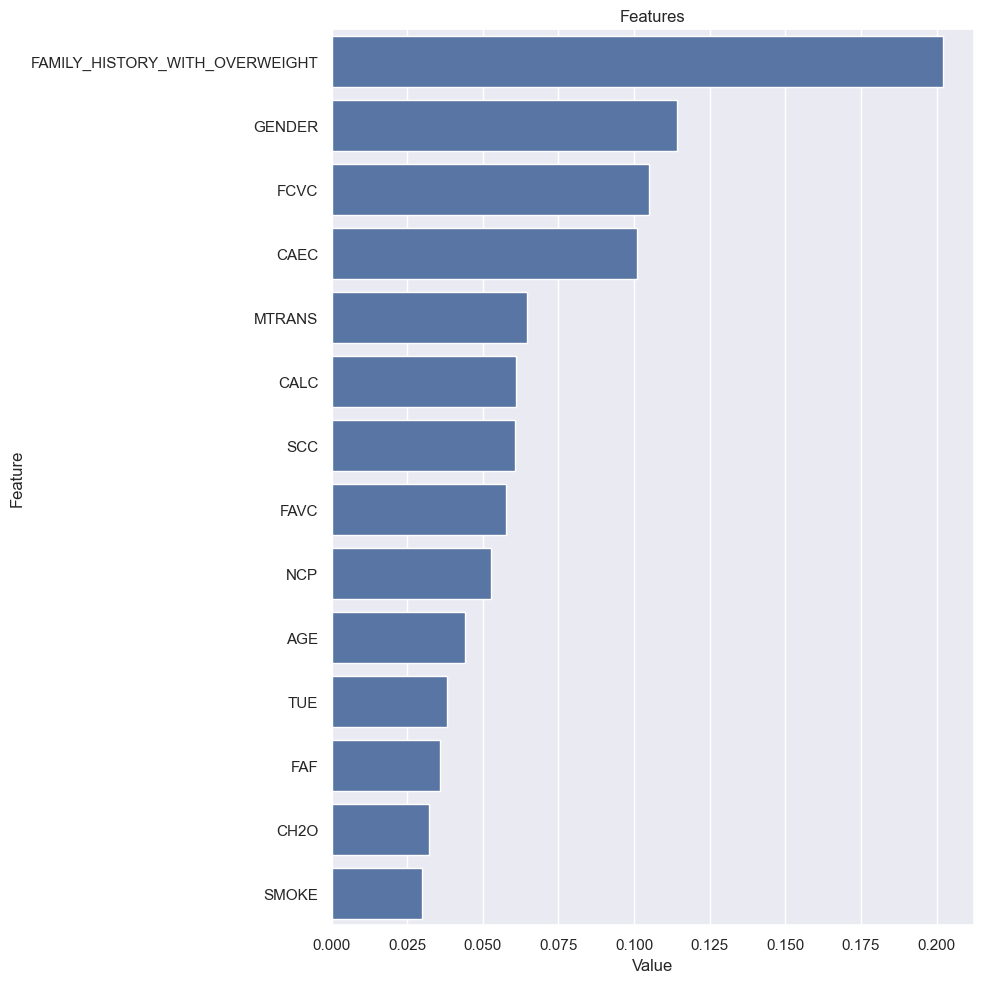

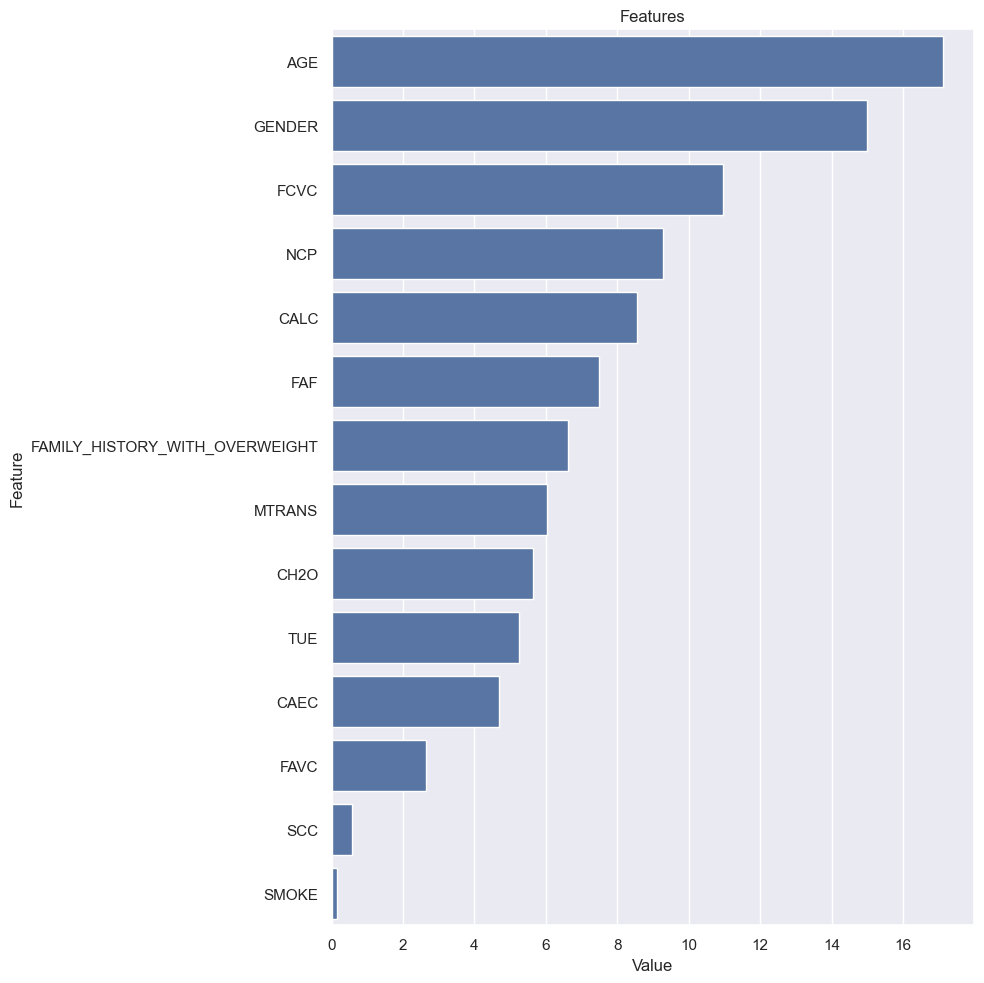

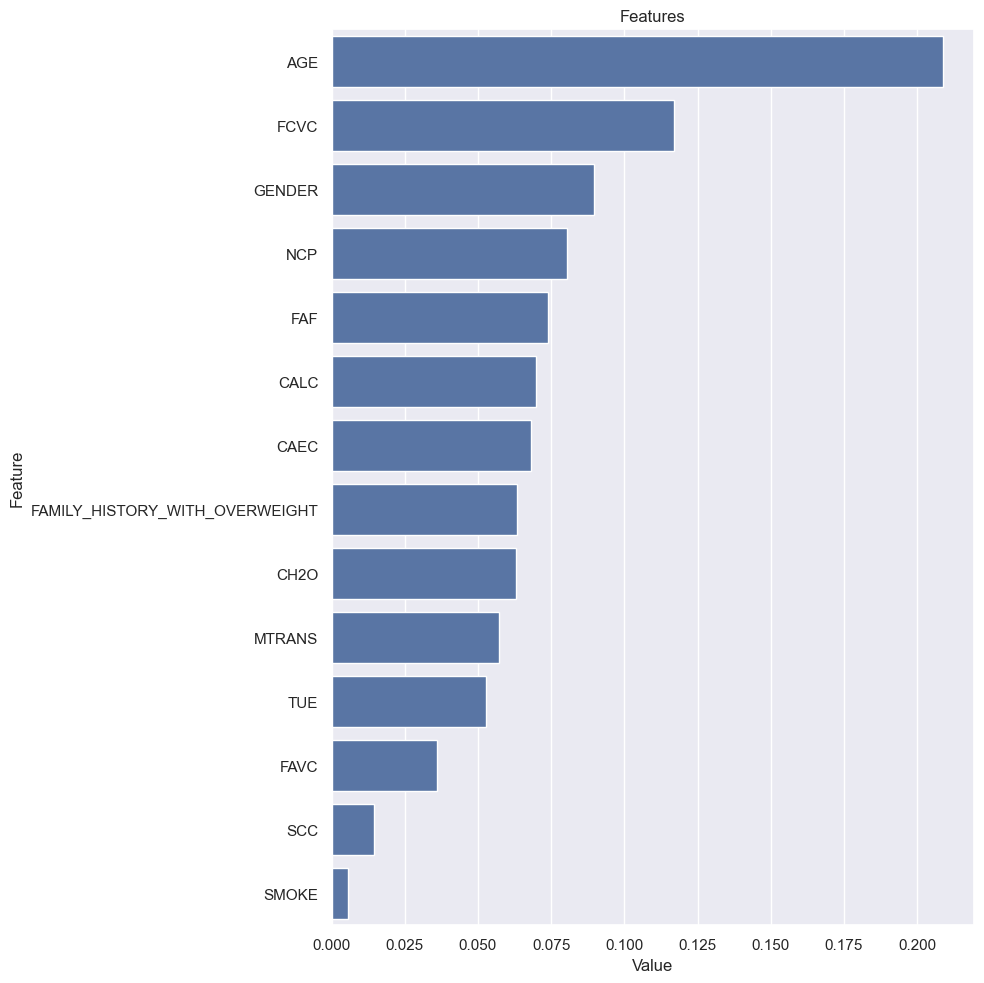

In [257]:
plot_importance(xgboost_final, X)
plot_importance(catboost_final, X)
plot_importance(rf_final, X)